### Production

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prod = pd.read_excel('../../Data/Production/production.xlsx', index_col = 0) * 0.01
prod.index = pd.date_range(start = '2000-01-01', end = '2023-10-01', freq='M')
prod

,production_idx,mine_prod_idx,const_prod_idx,service_idx,admin_prod_idx,gen_machine_idx,elec_machine_idx,prec_machine_idx,other_device_idx,vehicle_idx,other_vehicle_idx
2000-01-31,0.512,0.449,0.497,0.536,0.644,0.489,0.514,0.457,0.878,0.809,0.512
2000-02-29,0.483,0.416,0.483,0.518,0.527,0.531,0.548,0.432,0.756,0.750,0.658
2000-03-31,0.545,0.474,0.631,0.569,0.608,0.690,0.650,0.552,0.884,0.925,0.421
2000-04-30,0.528,0.448,0.673,0.546,0.607,0.734,0.646,0.540,0.880,0.706,0.500
2000-05-31,0.552,0.472,0.727,0.570,0.603,0.695,0.562,0.521,0.868,0.828,0.372
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,1.096,1.048,1.017,1.141,1.001,1.418,0.897,1.433,0.855,1.146,1.475
2023-06-30,1.149,1.075,1.158,1.176,1.221,1.442,0.939,1.629,0.887,1.360,1.471
2023-07-31,1.086,1.039,0.965,1.142,0.936,1.201,0.997,1.495,0.811,0.894,1.319
2023-08-31,1.093,1.057,1.003,1.140,0.950,1.127,0.993,1.397,0.833,0.942,1.447


#### Modeling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X1 = prod.iloc[:,1:]
y1 = prod['production_idx']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.05, shuffle = False)

model1 = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred1)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0010441953648668066


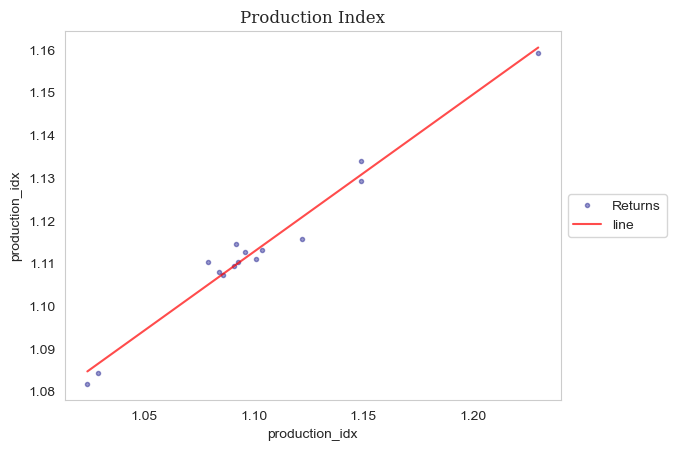

In [6]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test1 , y = y_pred1 ,deg = 1)
#plt.axvline(0, color = 'grey', alpha = 0.5)
#plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred1, x = y_test1, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test1, y = alpha + y_test1 * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Production Index', fontfamily = 'Serif')
plt.grid(False)
plt.show()

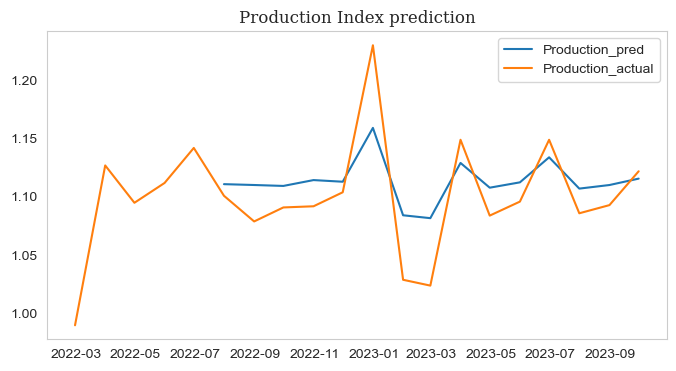

In [8]:
plt.figure(figsize = (8,4))
plt.plot(pd.Series(y_pred1, index = X_test1.index), label = 'Production_pred')
plt.plot(prod['production_idx'][-20:].dropna(), label = 'Production_actual')
plt.title('Production Index prediction', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.grid(False)

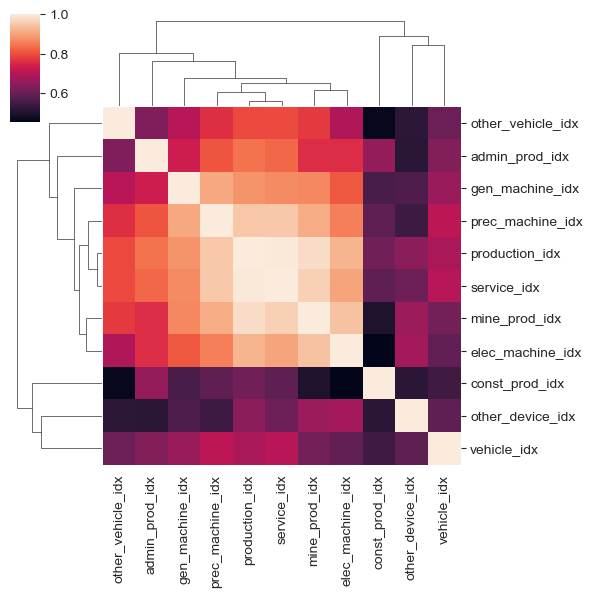

In [10]:
sns.clustermap(prod.corr(), figsize = (6,6))